### Importing Necessary Libraries

In [8]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

### Reading The Data

In [10]:
data=pd.read_csv('churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dropping Irrelevant Columns

In [11]:
data=data.drop('customerID',axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Counting empty string values and replacing it with numerical values

In [13]:
count=0
for i in data['TotalCharges']:
    if i==' ':
        count+=1
print('count of empty string: ', count)

count of empty string:  11


In [14]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Filling null values with mean 

In [15]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [16]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Extracting categorical data

In [18]:
cat = list(data.select_dtypes(include='O').keys())
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### Counting categories in each columns

In [19]:
for i in cat:
    print(data[i].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

### Replacing irrelevant categories

In [20]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service','No')
data['OnlineSecurity'] = data['OnlineSecurity'].replace('No internet service','No')
data['OnlineBackup'] = data['OnlineBackup'].replace('No internet service','No')
data['DeviceProtection'] = data['DeviceProtection'].replace('No internet service','No')
data['TechSupport'] = data['TechSupport'].replace('No internet service','No')
data['StreamingTV'] = data['StreamingTV'].replace('No internet service','No')
data['StreamingMovies'] = data['StreamingMovies'].replace('No internet service','No')

In [21]:
for i in cat:
    print(data[i].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
PaymentMethod
Electronic check   

### Decoding categorical values into numeric ones

In [22]:
label = LabelEncoder()
for i in cat:
    data[i] = label.fit_transform(data[i])
for i in cat:
    print(data[i].value_counts())

gender
1    3555
0    3488
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
PhoneService
1    6361
0     682
Name: count, dtype: int64
MultipleLines
0    4072
1    2971
Name: count, dtype: int64
InternetService
1    3096
0    2421
2    1526
Name: count, dtype: int64
OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64
OnlineBackup
0    4614
1    2429
Name: count, dtype: int64
DeviceProtection
0    4621
1    2422
Name: count, dtype: int64
TechSupport
0    4999
1    2044
Name: count, dtype: int64
StreamingTV
0    4336
1    2707
Name: count, dtype: int64
StreamingMovies
0    4311
1    2732
Name: count, dtype: int64
Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64
PaymentMethod
2    2365
3    1612
0    1544
1    1522
Name: count, dtype: int64
Churn
0    5174
1    1869
Name: count, dtype: int64


In [23]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

### Extracting numerical columns and scaling them

In [24]:
scale = MinMaxScaler()
num = ['tenure','MonthlyCharges','TotalCharges']
data[num] = scale.fit_transform(data[num])

### Dividing dataset into Independent and Target variables

In [25]:
X = data.drop('Churn',axis=1)
Y = data['Churn']

### Splitting train and test dataset

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

### Defining, compiling and fitting ANN model

In [28]:
model = Sequential([Dense(6, input_shape=(19,),activation='relu'),
                    Dropout(0.3),
                    Dense(6,activation='relu'),
                    Dropout(0.3),
                    Dense(1, activation='sigmoid')])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.5910 - accuracy: 0.7291
Epoch 2/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7291
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7291
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7291
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7291
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7291
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7291
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7291
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7291
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4849 - accura

### Predicting and unsclaing churn values

In [29]:
Y_pred = model.predict(X_test)
Y_pred_lis = []
for i in Y_pred:
    if i>0.5:
        Y_pred_lis.append(1)
    else:
        Y_pred_lis.append(0)

45/45 [==============================] - 0s 1ms/step


### Comparing originial and predicted data

In [30]:
data = {'orignal_churn':Y_test, 'predicted_churn': Y_pred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
6418,0,0
1948,1,1
4497,0,0
66,0,0
1705,0,0
924,0,0
1051,0,0
7012,0,0
3723,0,0
4590,0,0


### Performance matrices

In [31]:
print(classification_report(Y_test, Y_pred_lis))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1066
           1       0.62      0.51      0.56       343

    accuracy                           0.81      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409



Text(58.222222222222214, 0.5, 'True number')

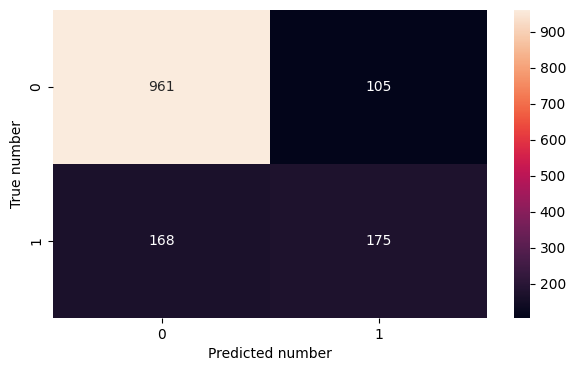

In [32]:
conf_mat = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred_lis)
plt.figure(figsize = (7,4))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted number')
plt.ylabel('True number')

In [34]:
print('Accuracy = ', (961+175)/(961+175+105+168)*100)

Accuracy =  80.62455642299503
